In [1]:
# Nahrál jsem data z csv souboru {MarekVašíček}_zdrojova_data.csv
import pandas as pd
df = pd.read_csv('{MarekVašíček}_zdrojova_data.csv', sep=';', encoding='utf-8-sig')

In [2]:
# 1. Jaká je průměrná cena bytů?

In [4]:
# Výpočet průměru
prumer = df['Cena bytu'].mean()

# Výpočet mediánu
median = df['Cena bytu'].median()

# Výsledek
print(f'Průměrná cena: {prumer} Kč.')
print(f'Medián ceny:   {median} Kč.')


Průměrná cena: 15316.666666666666 Kč.
Medián ceny:   15000.0 Kč.


In [5]:
# 2. Jaká je průměrná cena bytů pro každou dispozici? Zobrazte na grafu.

Průměrná cena bytu pro každou dispozici:
  Dispozice bytu  Cena bytu
0           1+kk    13900.0
1            4+1    15000.0
2           2+kk    15750.0


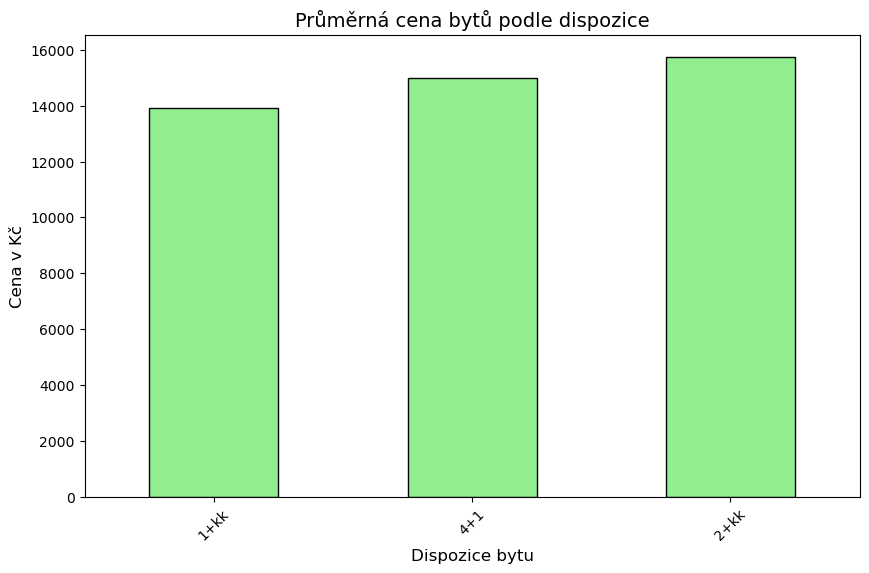

In [6]:
# Výpočet průměrné ceny pro každou dispozici
prumery_cena = df.groupby('Dispozice bytu')['Cena bytu'].mean().sort_values()

# Vypíšu tabulku
print('Průměrná cena bytu pro každou dispozici:')
print(prumery_cena.reset_index())

# GRAF
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
prumery_cena.plot(kind='bar', color='lightgreen', edgecolor='black')

# Nastavení popisků grafu
plt.title('Průměrná cena bytů podle dispozice', fontsize=14)
plt.xlabel('Dispozice bytu', fontsize=12)
plt.ylabel('Cena v Kč', fontsize=12)
plt.xticks(rotation=45)

# Úprava rozložení a zobrazení
plt.show()

In [7]:
# 3. Jaká je průměrná velikost bytu pro každou dispozici? Zobrazte na grafu.

Průměrná velikost bytu pro každou dispozici (v m2):
  Dispozice bytu  Rozmery bytu
0           1+kk         43.00
1           2+kk         64.25
2            4+1        150.00


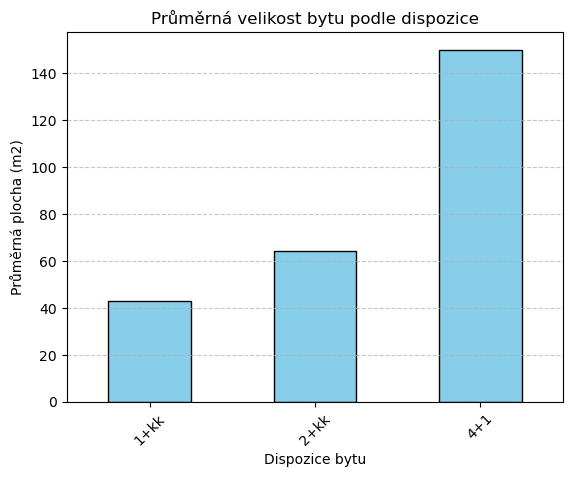

In [8]:
import matplotlib.pyplot as plt

# Výpočet průměrné velikosti pro každou dispozici
prumerna_velikost = df.groupby('Dispozice bytu')['Rozmery bytu'].mean().sort_values()

# Výsledek
print('Průměrná velikost bytu pro každou dispozici (v m2):')
print(prumerna_velikost.reset_index())

# Vytvořím sloupcový graf
prumerna_velikost.plot(kind='bar', color='skyblue', edgecolor='black')

# Přidám popisky
plt.title('Průměrná velikost bytu podle dispozice')
plt.xlabel('Dispozice bytu')
plt.ylabel('Průměrná plocha (m2)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Zobrazení grafu
plt.show()


In [9]:
# 4. Existuje ulice, kde je vyšší koncentrace dražších bytů (Definujte ,,dražší'' jako byty nad průměrnou cenou. 
# Zobrazte top 5 ulic s nejvyšší průměrnou cenou, pokud máte dostatek dat.)

In [10]:
# Zjistím celkovou průměrnou cenu všech bytů
celkovy_prumer = df['Cena bytu'].mean()
print(f'Celková průměrná cena je: {celkovy_prumer} Kč')
print('-' * 30)

# Seskupím data podle ulic a spočítám průměrnou cenu v každé z nich
ulice_prumery = df.groupby('Ulice')['Cena bytu'].mean().reset_index()

# Vyberu jen ty ulice, jejichř průměrná cena je vyšší než celkový průměr
drazsi_ulice = ulice_prumery[ulice_prumery['Cena bytu'] > celkovy_prumer]

# Seřadím je od nejdražší po nejlevnější a vezmu TOP 5
top_5_ulic = drazsi_ulice.sort_values(by='Cena bytu', ascending=False).head(5)

# Zjistil jsem, že nad průměrem jsou jen 4 ulice

# Výsledek
print('TOP 4 nejdražší ulice:')
print(top_5_ulic)

Celková průměrná cena je: 15316.666666666666 Kč
------------------------------
TOP 4 nejdražší ulice:
              Ulice  Cena bytu
3  Svatopluka Čecha    17000.0
0          Hybešova    16000.0


In [11]:
# 5. Jaký typ dispozice je v daném městě nejčastěji inzerován? 
# Který to je?
# Proč myslíte , že tomu tak je? (Zobrazte na grafu - např. bar chart. nebo pie chart)

Nejčastěji inzerovaný typ bytu je: 2+kk (celkem 4x)
------------------------------
Přehled všech dispozic:
  Dispozice bytu  count
0           2+kk      4
1           1+kk      1
2            4+1      1


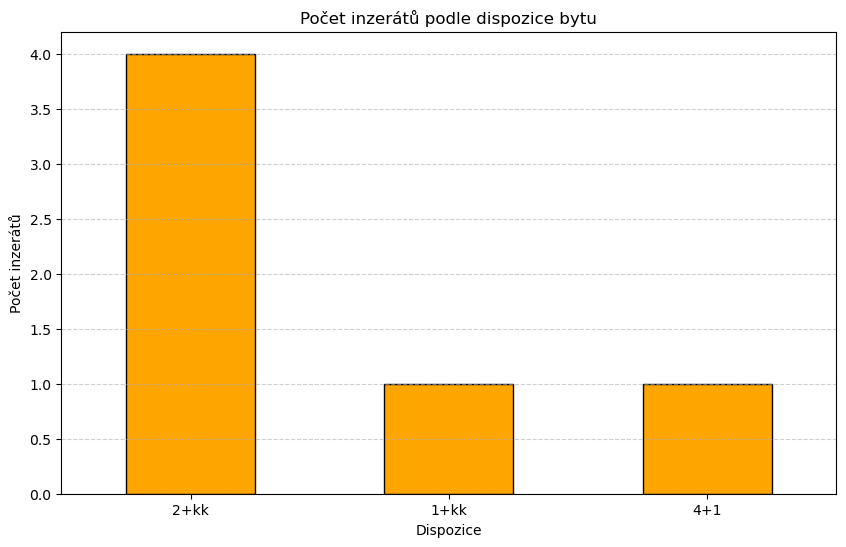

In [12]:
# Spočítám počet inzerátů pro každou dispozici
pocet_dispozic = df['Dispozice bytu'].value_counts()

# Zjistím, která je nejčastější
nejcastejsi = pocet_dispozic.idxmax()
pocet = pocet_dispozic.max()

print(f'Nejčastěji inzerovaný typ bytu je: {nejcastejsi} (celkem {pocet}x)')
print('-' * 30)
print('Přehled všech dispozic:')
print(pocet_dispozic.reset_index())

# Zjistil jsem, že je to 2+kk. Proč tomu tak je? - Myslím, že drtivá většina lidí vnímá 2+kk jako tu nejvhodnější variantu na start, hlavně kvůli poměru cena/poksytovaný prostor. 
# Může to být skvělý řešení hlavně pro páry, čerstvé rodiny, nebo třeba pro dva studenty, kteří chtějí mít více soukromí a prostoru pro sebe.

# Graf a popisky u os x a y
plt.figure(figsize=(10, 6))
pocet_dispozic.plot(kind='bar', color='orange', edgecolor='black')

plt.title('Počet inzerátů podle dispozice bytu')
plt.xlabel('Dispozice')
plt.ylabel('Počet inzerátů')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)


plt.show()

In [13]:
# 6. Existují zde inzerce bytů, které stojí více než 20.000 Kč?
# Pokud ano, jsou v této cenové hladině inzerovány i maximálně dvoupokojové byty (2+1/2+kk)?

In [14]:
# Nejprve zjistím, jestli existují inzerce bytů nad 20 000 Kč
drazsi_byty = df[df['Cena bytu'] > 20000]
if drazsi_byty.empty:
    print(f' Neexistují žádné inzerce bytů, které stojí více než 20 000 Kč.')

# Zjistil jsem, že inzerce nad 20 000 Kč se v mých datech nevyskytuje. Dál jsem tedy nic neprováděl.

 Neexistují žádné inzerce bytů, které stojí více než 20 000 Kč.


In [15]:
# 7. Zjistěte minimální a maximální cenu inzerce pro každou dispozici bytu. 
# Která dispozice má největší cenový rozptyl mezi minimální a maximální inzerovanou cenou? (Zobrazte i na grafu)

Rozdíly mezi nejlevnějším a nejdražším bytem pro každou dispozici:
  Dispozice bytu  Cena bytu
0           1+kk          0
1           2+kk       3000
2            4+1          0
Největší cenový rozptyl: 2+kk (rozdíl 3000 Kč)


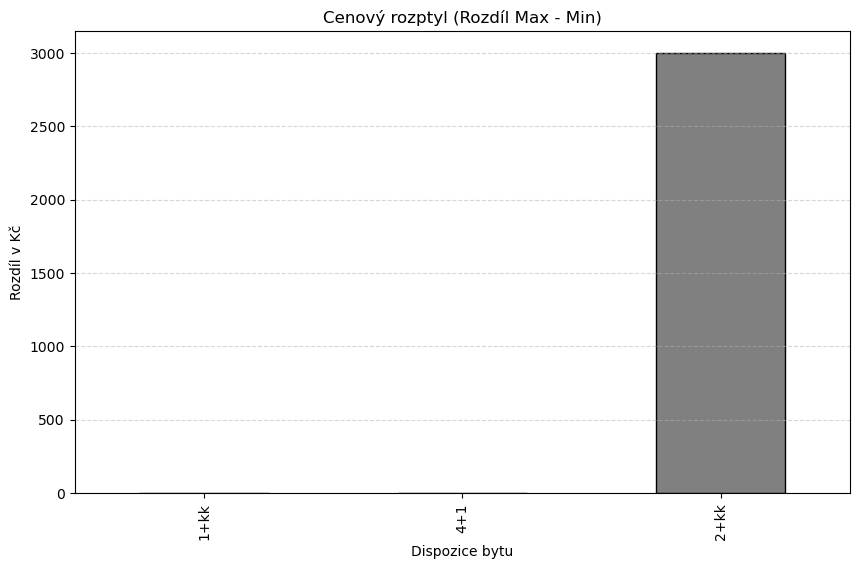

In [16]:
# Vypočítáme nejnižší a nejvyšší ceny zvlášť
minimalni_cena = df.groupby('Dispozice bytu')['Cena bytu'].min()
maximalni_cena = df.groupby('Dispozice bytu')['Cena bytu'].max()

# Rozptyl vypočítáme prostým odečtením těchto dvou výsledků
rozptyl = maximalni_cena - minimalni_cena

# Hledám dispozici s největším rozptylem
nejvetsi_rozptyl_hodnota = rozptyl.max()
nejvetsi_rozptyl = rozptyl.idxmax()

# Výsledek
print('Rozdíly mezi nejlevnějším a nejdražším bytem pro každou dispozici:')
print(rozptyl.reset_index())
print(f'Největší cenový rozptyl: {nejvetsi_rozptyl} (rozdíl {nejvetsi_rozptyl_hodnota} Kč)')

# GRAF
plt.figure(figsize=(10, 6))
rozptyl.sort_values().plot(kind='bar', color='gray', edgecolor='black')

plt.title('Cenový rozptyl (Rozdíl Max - Min)')
plt.xlabel('Dispozice bytu')
plt.ylabel('Rozdíl v Kč')

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()